In [2]:
from my_functions import*

In [3]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

In [4]:
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

nmin=0
nmax=3000

ZeroBias_eta=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin:nmax]
ZeroBias_phi=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin:nmax]
ZeroBias_pt=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin:nmax]

#Select quality 0 Z->mumu
Zmumu_pt=MuonTree_Zmumu["muon_pt"].array()[nmin:nmax]
Zmumu_eta=MuonTree_Zmumu["muon_eta"].array()[nmin:nmax]
Zmumu_phi=MuonTree_Zmumu["muon_phi"].array()[nmin:nmax]
#And select the Z peak pairsa
Zmumu_pt, Zmumu_eta, Zmumu_phi = get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


100%|██████████| 3000/3000 [00:01<00:00, 1681.70it/s]


energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


quality_selector: Only 21.265 % of the data has been selected
quality_selector: Only 21.265 % of the data has been selected
quality_selector: Only 21.265 % of the data has been selected


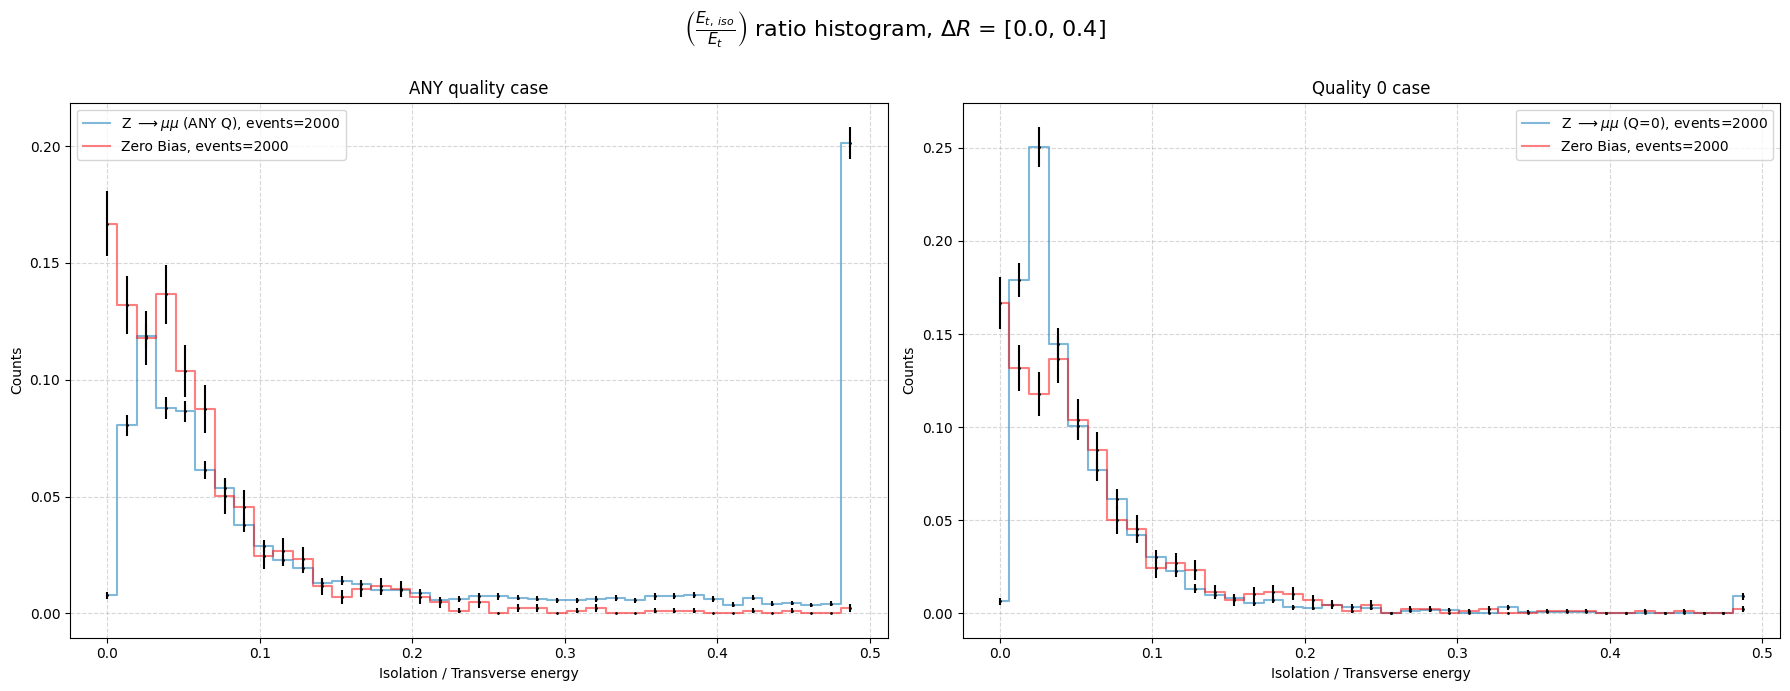

In [6]:


# %%
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

# %%
#Set delta R values and number of events to plot

dr_min=0.0
dr_max=0.4

nmin1=0
nmax1=2000

nmin2=0
nmax2=2000

ZeroBias_eta=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin2:nmax2]
ZeroBias_phi=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin2:nmax2]
ZeroBias_pt=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin2:nmax2]

# %%
"""
Z->mumu any quality
"""



#Compute the isolation for Z->mu mu events
pt_events=MuonTree_Zmumu["muon_pt"].array()[nmin1:nmax1]
eta_events=MuonTree_Zmumu["muon_eta"].array()[nmin1:nmax1]
phi_events=MuonTree_Zmumu["muon_phi"].array()[nmin1:nmax1]

data1=ak.flatten(pt_events)
isolation =muon_isolation_all_events(MuonTree_Zmumu, eta_events, phi_events, dr_min, dr_max, [nmin1,nmax1], 1000)
data2=ak.flatten(isolation)

ratio1=data2/data1

#Get the number of events with muons
not_empty_count1 = ak.sum(ak.num(pt_events) > 0)

#Compute the isolation for Zero Bias events



data1=ak.flatten(ZeroBias_pt)
isolation =muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi, dr_min, dr_max, [nmin2,nmax2], 1000)
data2=ak.flatten(isolation)

ratio2=data2/data1

#Get the number of events with muons
not_empty_count2 = ak.sum(ak.num(pt_events) > 0)


"""
Z -> mu mu vs ZeroBias offline QUALITY 0
"""

#Compute the isolation for Z->mu mu events
pt_events=quality_selector(MuonTree_Zmumu["muon_quality"].array(), MuonTree_Zmumu["muon_pt"].array(), 0)[nmin1:nmax1]
eta_events=quality_selector(MuonTree_Zmumu["muon_quality"].array(), MuonTree_Zmumu["muon_eta"].array(), 0)[nmin1:nmax1]
phi_events=quality_selector(MuonTree_Zmumu["muon_quality"].array(), MuonTree_Zmumu["muon_phi"].array(), 0)[nmin1:nmax1]

data1=ak.flatten(pt_events)
isolation =muon_isolation_all_events(MuonTree_Zmumu, eta_events, phi_events, dr_min, dr_max, [nmin1,nmax1], 1000)
data2=ak.flatten(isolation)

ratio3=data2/data1

#Get the number of events with muons
not_empty_count3 = ak.sum(ak.num(pt_events) > 0)

#Since we are using the same data, we can just copy the ratio and the not_empty_count
ratio4=ratio2
not_empty_count4 =not_empty_count2



# %%
"""
I define this functions to plot everything more comfortably and as subplots
"""

def f(i,ax):
    #This line is used to set the axis to the current axis
    plt.sca(ax)
    
    if i==0:
        #Set the colors and labels for the plot
        colors=["#0072B2", "#FD0000"]
        labels=[fr"Z $\longrightarrow \mu \mu$ (ANY Q), events={not_empty_count1}",fr"Zero Bias, events={not_empty_count2}"]

        #Plot the data
        coolplot([ratio1,ratio2],
                        np.linspace(0,0.5,40),
                        colors,labels,
                        "Isolation / Transverse energy","Counts",
                "ANY quality case",
                plot_show=False)

    if i==1:
        #Set the colors and labels for the plot
        colors=["#0072B2", "#FD0000"]
        labels=[fr"Z $\longrightarrow \mu \mu$ (Q=0), events={not_empty_count3}",fr"Zero Bias, events={not_empty_count4}"]

        #Plot the data
        coolplot([ratio3,ratio4],
                        np.linspace(0,0.5,40),
                        colors,labels,
                        "Isolation / Transverse energy","Counts",
                "Quality 0 case",
                plot_show=False)

def f_subplots():
    # Plot as subplots
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))
    
    ax=ax.flatten()
    #for each lower and upper limit, plot the data
    for i in [0,1]:
        f(i,ax[i])

    fig.suptitle(fr"$\left(\frac{{E_{{t,\;iso}}}}{{E_t}}\right)$ ratio histogram, $\Delta R$ = [{dr_min}, {dr_max}]",fontsize=16)  # Set the global title
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to leave space for suptitle
    plt.show()

f_subplots()

In [21]:
np.cumsum?

Signature:       np.cumsum(a, axis=None, dtype=None, out=None)
Call signature:  np.cumsum(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function cumsum at 0x71ebf710b880>
File:            ~/anaconda3/envs/thesis/lib/python3.13/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Return the cumulative sum of the elements along a given axis.

Parameters
----------
a : array_like
    Input array.
axis : int, optional
    Axis along which the cumulative sum is computed. The default
    (None) is to compute the cumsum over the flattened array.
dtype : dtype, optional
    Type of the returned array and of the accumulator in which the
    elements are summed.  If `dtype` is not specified, it defaults
    to the dtype of `a`, unless `a` has an integer dtype with a
    precision less than that of the default platform integer.  In
    that case, the default platform integer is used.
out : ndarray, optional
    Alternative output array in which to place the res

In [27]:
array=np.array([0,0,0,1])

In [28]:
np.cumsum(array)

array([0, 0, 0, 1])